In [46]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

#https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download
datos = pd.read_csv("housing.csv")

# Descripción del DataSet


Los datos contienen información de un distrito en California y algunas estadísticas resumidas sobre las casas en ese distrito, basadas en datos del censo de 1990.


1. **Longitud:** Es una medida de cuán lejos al oeste se encuentra una casa; un valor más alto indica que está más al oeste.

2. **Latitud:** Es una medida de cuán al norte se encuentra una casa; un valor más alto significa que está más al norte.

3. **Edad Mediana de la Vivienda:** Es la edad mediana de las casas en un bloque; un número más bajo indica que son edificios más nuevos.

4. **Total de Habitaciones:** El número total de habitaciones en un bloque.

5. **Total de Dormitorios:** El número total de dormitorios en un bloque.

6. **Población:** El número total de personas que viven en un bloque.

7. **Hogares:** El número total de hogares, es decir, grupos de personas que viven juntas en una unidad de vivienda, en un bloque.

8. **Ingreso Mediano:** El ingreso mediano de los hogares en un bloque de casas (medido en decenas de miles de dólares estadounidenses).

9. **Valor Mediano de la Vivienda:** El valor mediano de las casas en un bloque (medido en dólares estadounidenses).

10. **Proximidad al Océano:** La ubicación de la casa con respecto al océano o al mar(OCEAN,	INLAND,	ISLAND,	NEAR BAY, NEAR OCEAN).

In [47]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [48]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Preprocesamiento de Datos

**Valores Faltantes:**

En este conjunto de datos, se ven **valores faltantes** en la columna "total_bedrooms." Mientras que otras columnas cuentan con 20,640 valores completos, en esta columna específica solo tenemos 20,433 registros con datos disponibles. Es esencial abordar estos valores faltantes antes de proceder con el análisis o la construcción del modelo, ya que pueden afectar la calidad de los resultados.

**Existen dos estrategias comunes para lidiar con los valores faltantes:**

- **Eliminación de filas:** Una opción consiste en eliminar las filas que contienen valores faltantes. Sin embargo, esta estrategia es adecuada si la cantidad de filas afectadas es relativamente pequeña y no impacta significativamente la representatividad del conjunto de datos.

- **Imputación de valores:** Otra alternativa es realizar una imputación de los valores faltantes, lo que significa estimar valores para los registros que carecen de información. Una técnica habitual es reemplazar los valores faltantes en la columna "total_bedrooms" por la media o la mediana de dicha columna. Esto preserva las filas afectadas y puede resultar útil si esta columna es relevante para el modelo.


**Características:**

Este conjunto de datos incluye una característica categórica de texto denominada "ocean_proximity." Sin embargo, los modelos de regresión lineal trabajan de manera óptima con **características numéricas**, por lo que es necesario convertir esta característica categórica en variables numéricas antes de incorporarla al modelo.

Una técnica ampliamente utilizada para realizar esta conversión es la "codificación one-hot" (también conocida como "dummy encoding"). Con la codificación one-hot, cada categoría única presente en la columna "ocean_proximity" se transforma en una nueva columna binaria. Cada una de estas nuevas columnas indica si una fila pertenece o no a una categoría específica. Esto asegura que cada categoría tenga su propio impacto en el modelo, sin asumir un orden inherente.

Por ejemplo, si tiene categorías como "Near Ocean, Inland, Near Bay," etc., después de aplicar la codificación one-hot, obtendremos columnas separadas para cada una de estas categorías. En estas columnas, un "1" indicará que una fila pertenece a la categoría correspondiente, mientras que un "0" indicará lo contrario. Esta transformación permite incorporar la característica categórica de "ocean_proximity" de manera efectiva en el modelo de regresión lineal, evitando que se interpreten los números como si tuvieran un significado numérico en el contexto de "ocean_proximity".

In [50]:
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


La función describe() proporciona un resumen estadístico de las columnas numéricas de un DataFrame.Estos estadísticos proporcionan una visión general de la distribución de tus datos y son útiles para identificar valores atípicos, comprender la variabilidad y tomar decisiones informadas en el análisis de datos 

- **count:** Este valor muestra la cantidad de registros no nulos en cada columna. En tu conjunto de datos, todas las columnas tienen 20,640 registros, excepto la columna 'total_bedrooms', que tiene 20,433 registros no nulos. Esto significa que hay algunos valores faltantes en la columna 'total_bedrooms'.

- **mean:** La media representa el promedio de los valores en cada columna. Por ejemplo, la media de 'longitude' es aproximadamente -119.569704, lo que significa que, en promedio, las ubicaciones geográficas tienen una longitud cercana a ese valor.

- **std:** La desviación estándar mide la dispersión de los valores en cada columna. Cuanto mayor sea la desviación estándar, mayor será la variabilidad de los datos. Por ejemplo, la desviación estándar de 'median_house_value' es aproximadamente 115,395.62, lo que indica que los valores de precios de viviendas varían considerablemente alrededor de la media.

- **min:** El valor mínimo en cada columna es el valor más pequeño observado. Por ejemplo, el valor mínimo de 'median_income' es 0.4999.

- **25%:** El percentil 25 (25%) de la columna 'median_income' representa el valor por debajo del cual se encuentra el 25% de los datos de ingresos medios. En este caso, el 25% de los registros tienen un ingreso medio igual o inferior a 2.5634.

- **50%:** El percentil 50 (50%) de la columna 'median_income' es igual a la mediana y divide los datos en dos mitades iguales. Aquí, la mediana es 3.5348, lo que significa que la mitad de las ubicaciones geográficas tienen un ingreso medio inferior a 3.5348, y la otra mitad tiene un ingreso medio superior.

- **75%:** El percentil 75 (75%) de 'median_income' indica el valor por debajo del cual se encuentra el 75% de los datos de ingresos medios. En este contexto, el 75% de las ubicaciones geográficas tienen un ingreso medio igual o inferior a 4.74325.

# Visualizar Dataset

Estos gráficos te muestran cuántas veces se repiten los datos, lo que te permite visualizar con claridad cuáles valores son más comunes en el conjunto de datos.

- **datos:** Esta variable contiene el conjunto de datos que se va a visualizar.

- **hist():** Esta función pertenece a la biblioteca Matplotlib y se utiliza para crear un histograma, que es un gráfico que representa la distribución de frecuencia de un conjunto de datos.

- **figsize=(15, 8):** El tamaño de la figura en la que se mostrará el histograma se determina con este parámetro. En este caso, la figura tendrá un tamaño de 15 unidades de ancho y 8 unidades de alto.

- **bins=30:** El parámetro bins especifica la cantidad de contenedores (o barras) en el histograma. En este caso, se han especificado 30 contenedores, lo que significa que el histograma se dividirá en 30 barras que representarán la distribución de los datos.

- **edgecolor="black":** El parámetro edgecolor establece el color del borde de las barras del histograma. En este caso, se ha establecido en "black" (negro).

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

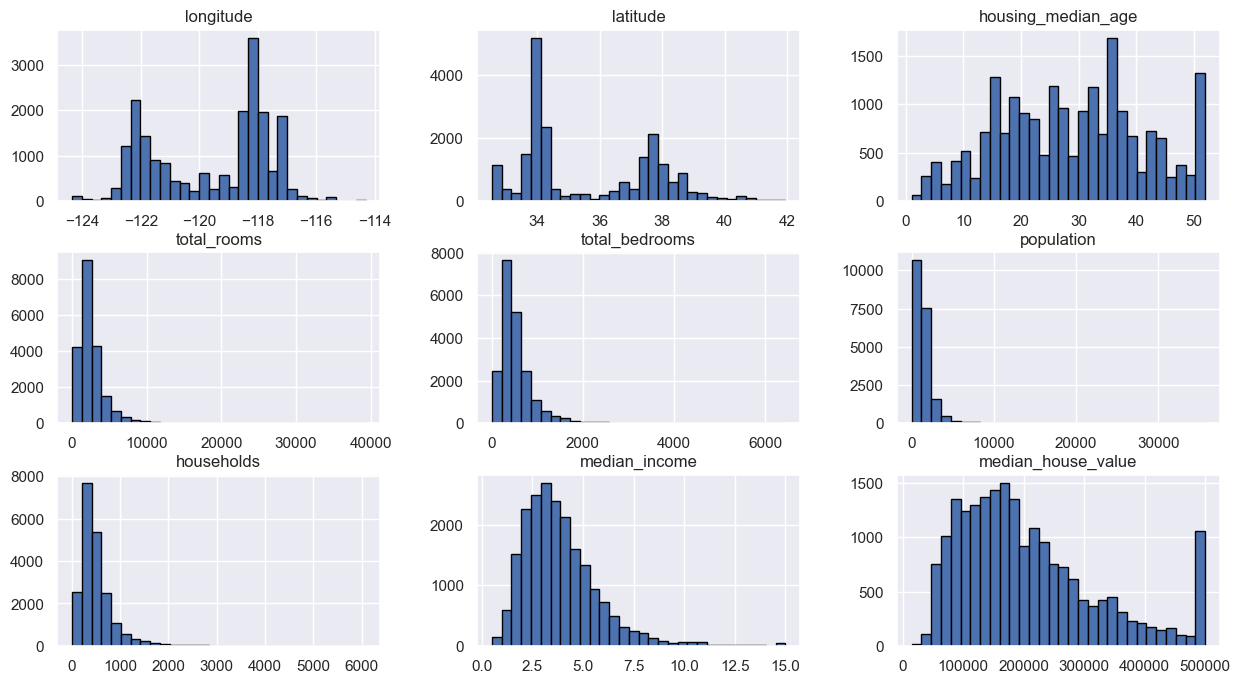

In [51]:
datos.hist(figsize=(15,8), bins = 30, edgecolor = "black")

# Análisis de los graficos

Es posible que encontrar varios valores altos en el extremo derecho del gráfico, lo que indica la existencia de un límite superior, más allá del cual cualquier dato que lo supere se suma a ese valor límite. Por ejemplo, en el caso de **"median_house_value"** algunas viviendas pueden superar el valor de 500,000 dólares, pero se encuentran agrupadas en este valor límite como un tope superior. Sucede igual con la variable **"housing_median_age"**

Se pueden observar patrones que nos brindan información valiosa. Por ejemplo, en las variables "total_rooms" y "total_bedrooms," vemos que la mayoría de las ubicaciones geográficas tienen un número relativamente bajo de habitaciones y dormitorios, ya que estas variables se agrupan hacia la izquierda de la gráfica. Sin embargo, a medida que se avanza hacia la derecha, se encontra un número cada vez menor de ubicaciones con un alto número de habitaciones o dormitorios

<Axes: xlabel='latitude', ylabel='longitude'>

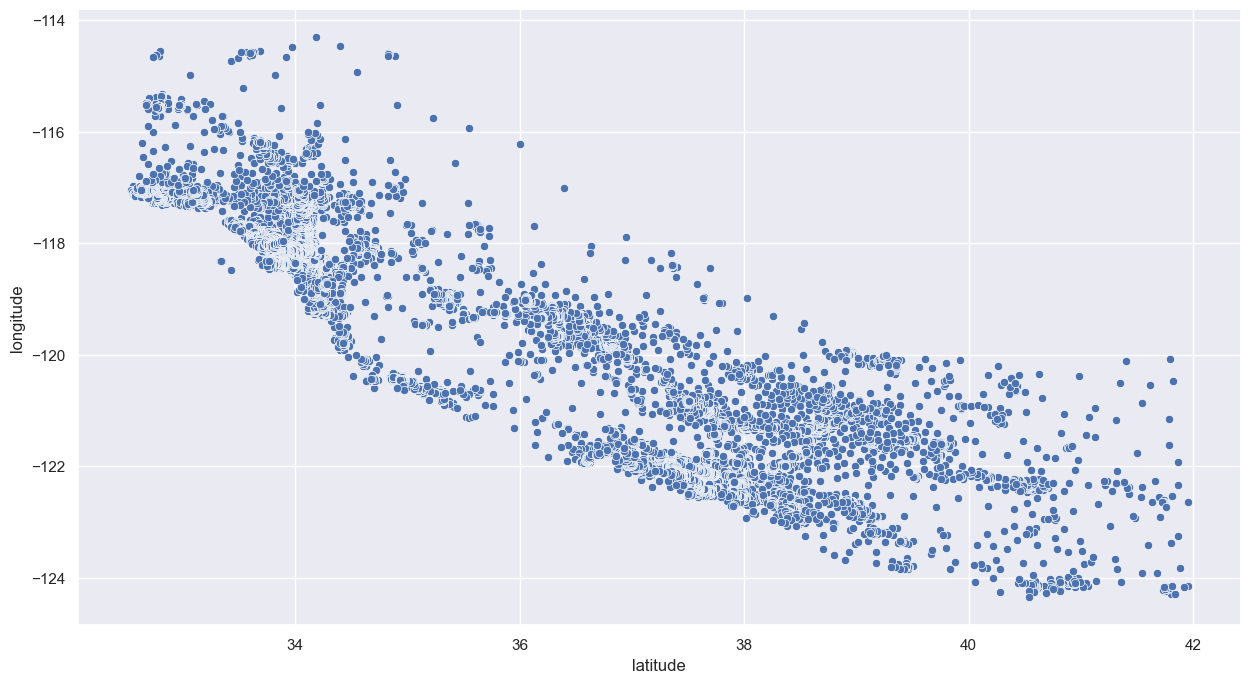

In [52]:
sb.scatterplot(x="latitude", y="longitude",data = datos)

Este gráfico compara los datos de latitud y longitud con un mapa de California, ayudándo a entender cómo se relacionan los valores geográficos con la ubicación en el estado.

<img src="assets/mapa.png" alt="mapa" width="600"/>


<Axes: xlabel='latitude', ylabel='longitude'>

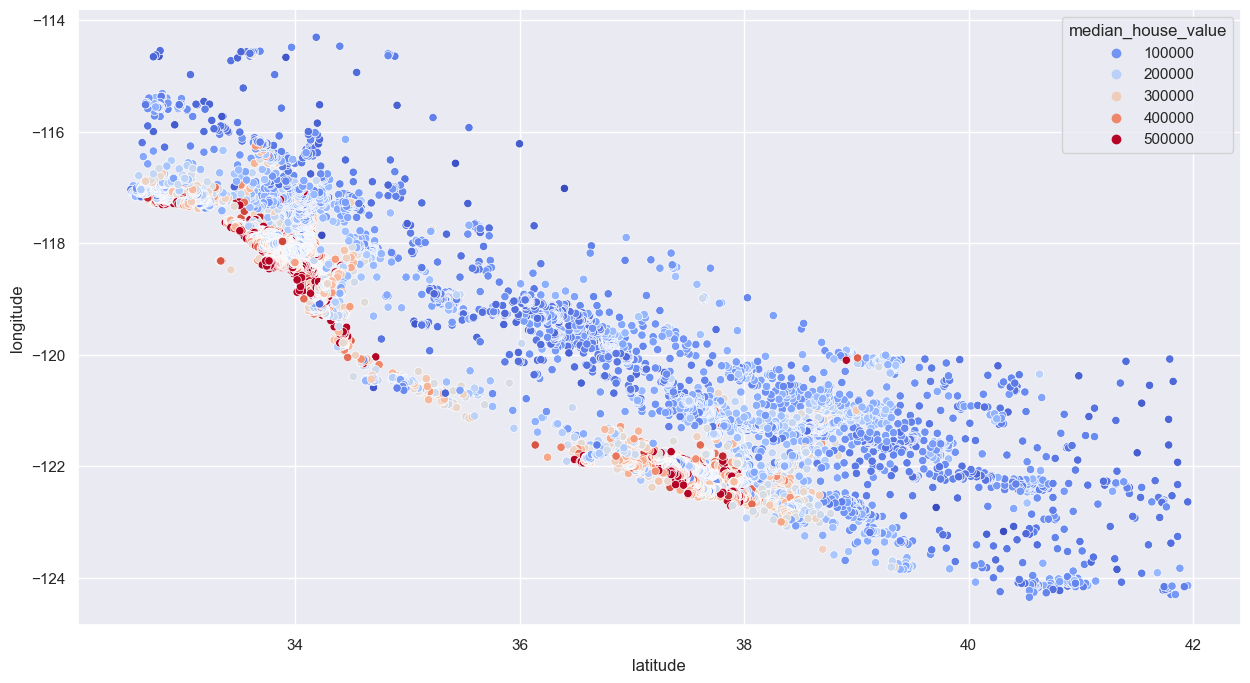

In [53]:
sb.scatterplot(x="latitude", y="longitude",data = datos, hue="median_house_value",palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

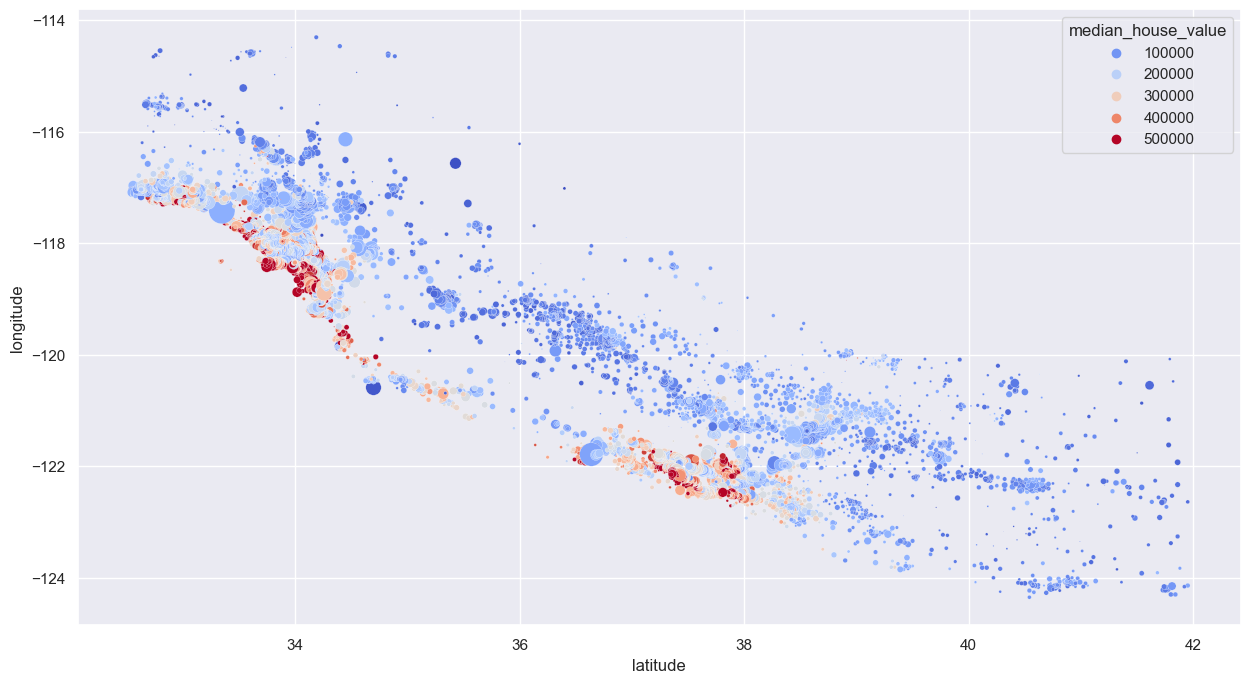

In [54]:
sb.scatterplot(x="latitude", y="longitude",data = datos, hue="median_house_value",palette="coolwarm",s=datos["population"]/100)

<Axes: xlabel='latitude', ylabel='longitude'>

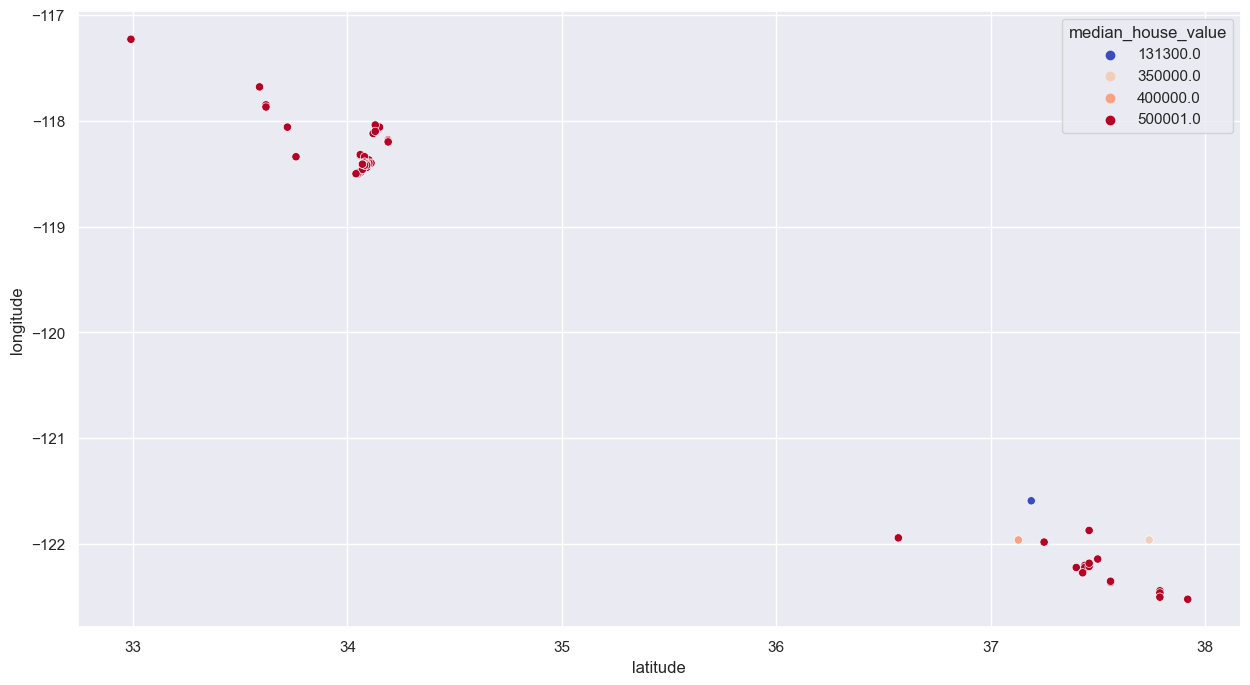

In [55]:
sb.scatterplot(x="latitude", y="longitude",data = datos[(datos.median_income > 14)], hue="median_house_value",palette="coolwarm")

# Limpieza de datos

In [56]:
datos_na = datos.dropna()
datos_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [57]:
datos_na["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [58]:
pd.get_dummies(datos_na["ocean_proximity"], dtype=int)



,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [59]:
dummies = pd.get_dummies(datos_na["ocean_proximity"], dtype=int)

datos_na = datos_na.join(dummies)

In [60]:
datos_na = datos_na.drop(["ocean_proximity"], axis=1)

In [61]:
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [62]:
datos_na.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

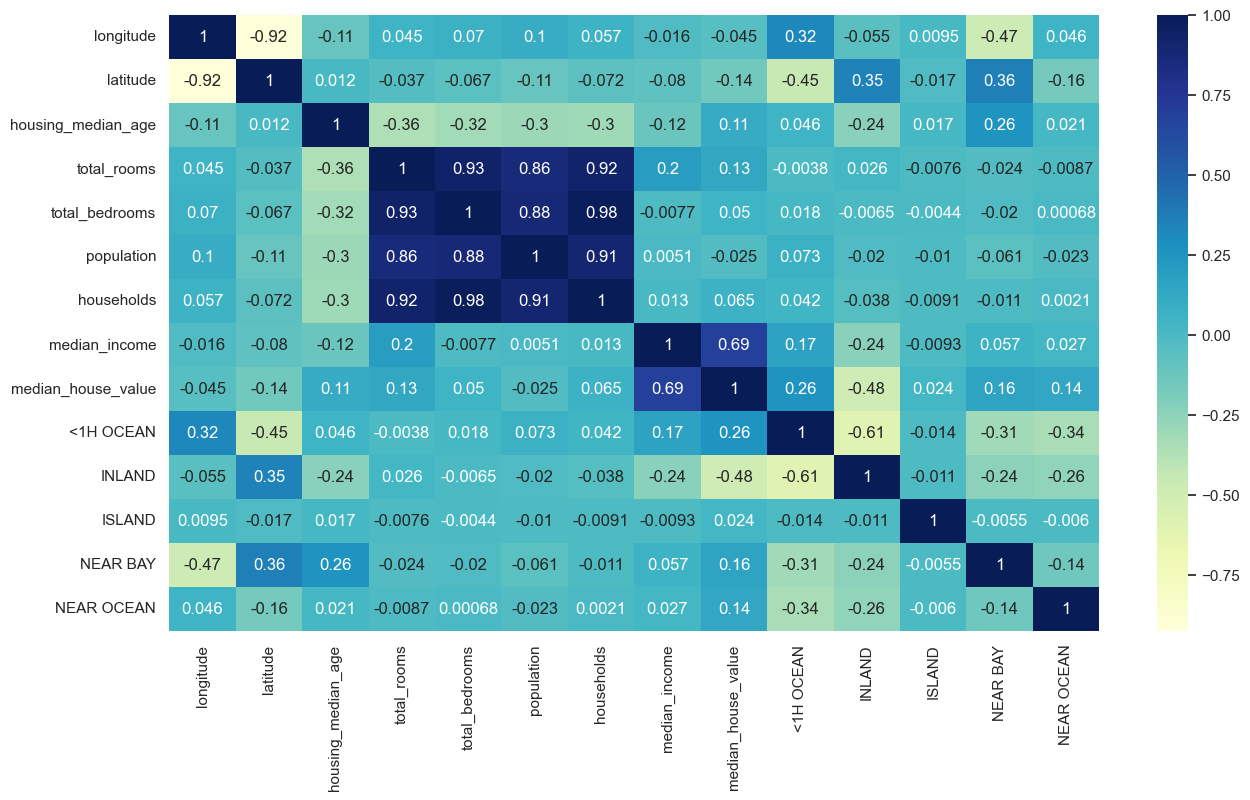

In [63]:
sb.set(rc={'figure.figsize':(15,8)})

sb.heatmap(datos_na.corr(), annot=True, cmap = "YlGnBu")

In [70]:
datos_na.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64